# DISPLAYING TABLE (CSV)
We chose the drinks.csv dataset which is a dataset with beverage consumption per country split by different types of beverages. In this section, we are making sure that we have access to the table and storing it to a variable called Drink_data. Our dataset is from the Canvas files provided to us on the assignment, the LabHelp/Labs/data/drinks.csv. 

What the below code does is it reads the drinks.csv file from our data folder and displays the head of the dataframe.

In [57]:
# DISPLAYING TABLE (CSV)
import os
import numpy as np
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

path = "./data/"

filename_read = os.path.join(path,"drinks.csv")
drink_Data = pd.read_csv(filename_read, na_values=['NA','?'])
drink_Data.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
5,Antigua & Barbuda,102,128,45,4.9,North America
6,Argentina,193,25,221,8.3,South America
7,Armenia,21,179,11,3.8,Europe
8,Australia,261,72,212,10.4,Oceania
9,Austria,279,75,191,9.7,Europe


# MISSING VALUE
In this portion, we are looking for the amount of missing values in each column. In here, since we have previously read and store the drinks.csv we can use the variable: drink_Data. The first code portion is checking to see where all empty value are and replacing them with pandas NaN so that we can see where all the missing values are based off the column they are in. As seen below, we found that there are no missing values in the drinks.csv dataset.

In [58]:
# MISSING INPUTS

import numpy as np

drink_Data = drink_Data.replace('', np.NaN)

print('Number of instances = %d' % (drink_Data.shape[0]))
print('Number of attributes = %d' % (drink_Data.shape[1]))

print('Number of missing values:')
for col in drink_Data.columns:
    print('\t%s: %d' % (col,drink_Data[col].isna().sum()))

Number of instances = 193
Number of attributes = 6
Number of missing values:
	country: 0
	beer_servings: 0
	spirit_servings: 0
	wine_servings: 0
	total_litres_of_pure_alcohol: 0
	continent: 0


In [59]:
drink_Data_missing = drink_Data.copy()
drink_Data_missing.iloc[3, 0] = None
drink_Data_missing.iloc[0, 3] = np.NaN

# Now we should see 2 missing values 
print('Number of missing values:')
for col in drink_Data_missing.columns:
    print('\t%s: %d' % (col,drink_Data_missing[col].isna().sum()))

Number of missing values:
	country: 1
	beer_servings: 0
	spirit_servings: 0
	wine_servings: 1
	total_litres_of_pure_alcohol: 0
	continent: 0


We can replace the missing numerical values with their column median.

In [60]:
missing_values_column = drink_Data_missing['wine_servings']

print('Before replacing missing values:')
print(missing_values_column[:4])

missing_values_column=missing_values_column.fillna(missing_values_column.median())
print('\nAfter replacing missing values:')
print(missing_values_column[:4])

drink_Data_missing['wine_servings'] = missing_values_column
print('Number of missing values:')
for col in drink_Data_missing.columns:
    print('\t%s: %d' % (col,drink_Data_missing[col].isna().sum()))

Before replacing missing values:
0      NaN
1     54.0
2     14.0
3    312.0
Name: wine_servings, dtype: float64

After replacing missing values:
0      8.5
1     54.0
2     14.0
3    312.0
Name: wine_servings, dtype: float64
Number of missing values:
	country: 1
	beer_servings: 0
	spirit_servings: 0
	wine_servings: 0
	total_litres_of_pure_alcohol: 0
	continent: 0


We decided to drop the rows that have missing categorical values (country name) since we could not find a good way to replace it.
The resulted clean dataframe is drink_Data_clean.

In [61]:
print('Before replacing missing values:')
print('Number of rows before discarding missing values = %d' % (drink_Data.shape[0]))
drink_Data_clean = drink_Data_missing.dropna()
print('Number of rows after discarding missing values = %d' % (drink_Data_clean.shape[0]))

Before replacing missing values:
Number of rows before discarding missing values = 193
Number of rows after discarding missing values = 192


# OUTLIERS

We start with a boxplot of the dataframe after we drop the categorical columns (country and continent).
Visually outliers will show up at the extremities of the boxplot.

<Axes: >

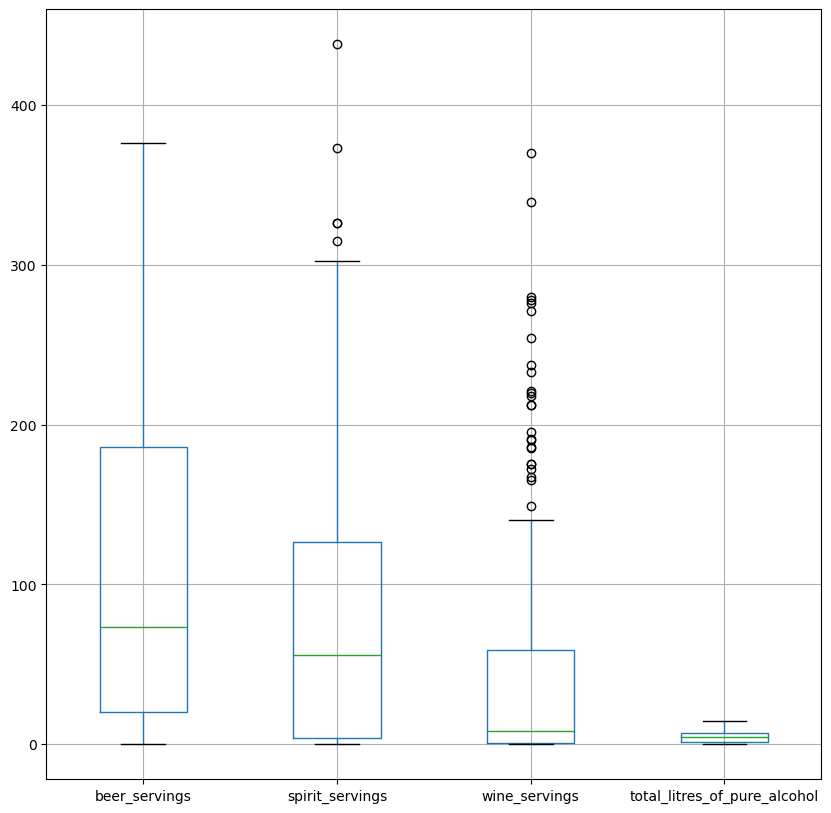

In [62]:
%matplotlib inline

# Drop categorical values and boxplot
data2 = drink_Data_clean.drop(['country', 'continent'],axis=1)
data2.boxplot(figsize=(10,10))

To detect outliers we are going to compute the Z-score of each column. In the code below, we are finding the standardization of each row. Note that because we are still using the variable data2, it does not have the column 'country' and 'continent'. We apply the formula for standardizing and then print out each row standardization.

In [63]:
Z = (data2-data2.mean())/data2.std()
Z

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,-1.044907,-0.912682,-0.510813,-1.249929
1,-0.162899,0.580219,0.075697,0.059573
2,-0.797152,-0.912682,-0.439916,-1.062857
4,1.105607,-0.268020,-0.040316,0.326819
5,-0.034066,0.534980,-0.040316,0.059573
...,...,...,...,...
188,2.255191,0.218304,-0.581709,0.807860
189,0.055126,-0.890062,-0.607490,-0.715438
190,-0.985446,-0.912682,-0.620380,-1.223204
191,-0.727781,-0.697794,-0.568819,-0.581815


We decided to use the outside of the interval of -3 to 3 on the Z-Scores to exclude outliers. We also print what were the outlier candidates for removal.

In [64]:
print('Number of rows before discarding outliers = %d' % (Z.shape[0]))
Z2 = Z.loc[((Z > -3).sum(axis=1)==4) & ((Z <= 3).sum(axis=1)==4)]
print('Number of rows after discarding outliers = %d' % (Z2.shape[0]))
zDrop = Z.loc[((Z <= -3).sum(axis=1)>=1) | ((Z > 3).sum(axis=1)>=1)]
zDrop

Number of rows before discarding outliers = 192
Number of rows after discarding outliers = 188


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
15,0.362342,3.305894,-0.078987,2.598404
61,0.213689,0.795106,4.149040,1.903566
68,0.927224,4.041035,-0.259451,1.930290
136,0.877673,-0.154921,3.749440,1.689770


<Axes: >

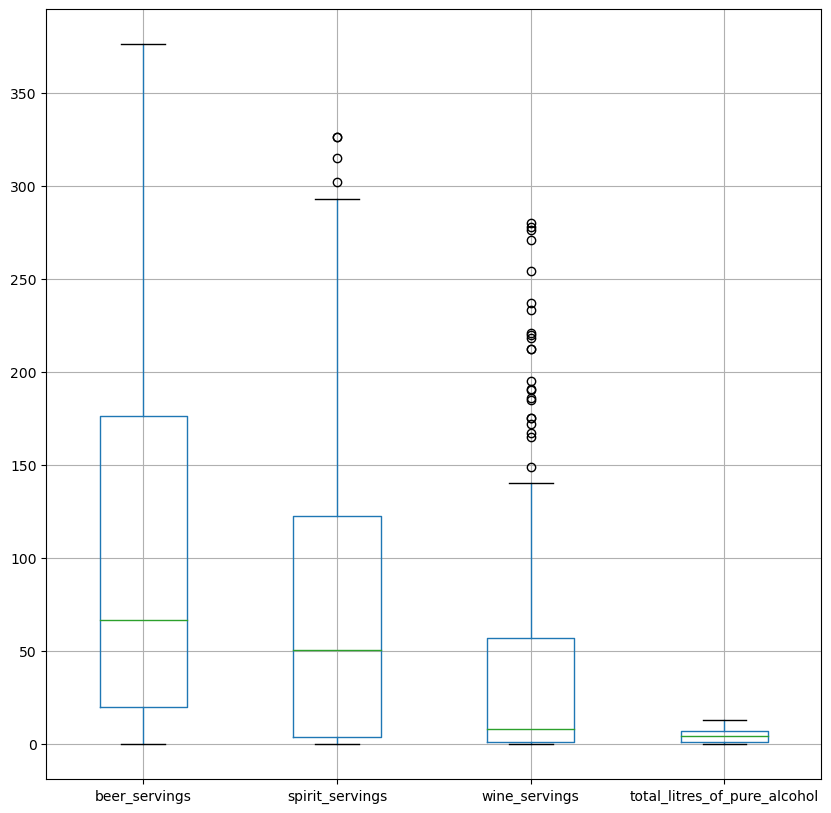

In [65]:
# Box plot after removing outliers
data2_outremoved = data2.loc[((Z > -3).sum(axis=1)==4) & ((Z <= 3).sum(axis=1)==4)]
drink_Data_clean_outremoved = drink_Data_clean.loc[((Z > -3).sum(axis=1)==4) & ((Z <= 3).sum(axis=1)==4)]
data2_outremoved.boxplot(figsize=(10,10))

# Sorting Dataframes

The code below is showing what sorting by a column is like. Let's sort descending on total litres of alcohol.

In [66]:
# SORTING BY total_litres_of_pure_alcohol
sorted_drink_Data = drink_Data_clean_outremoved.sort_values(by='total_litres_of_pure_alcohol',ascending=False)
sorted_drink_Data[:20]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
98,Lithuania,343,244,56.0,12.9,Europe
45,Czech Republic,361,170,134.0,11.8,Europe
141,Russian Federation,247,326,73.0,11.5,Asia
99,Luxembourg,236,133,271.0,11.4,Europe
81,Ireland,313,118,165.0,11.4,Europe
155,Slovakia,196,293,116.0,11.4,Europe
75,Hungary,234,215,185.0,11.3,Europe
65,Germany,346,117,175.0,11.3,Europe
135,Poland,343,215,56.0,10.9,Europe
156,Slovenia,270,51,276.0,10.6,Europe


In [67]:
# SORTING BY beer_servings
sorted_drink_Data = drink_Data_clean_outremoved.sort_values(by='total_litres_of_pure_alcohol',ascending=False)
sorted_drink_Data[:20]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
98,Lithuania,343,244,56.0,12.9,Europe
45,Czech Republic,361,170,134.0,11.8,Europe
141,Russian Federation,247,326,73.0,11.5,Asia
99,Luxembourg,236,133,271.0,11.4,Europe
81,Ireland,313,118,165.0,11.4,Europe
155,Slovakia,196,293,116.0,11.4,Europe
75,Hungary,234,215,185.0,11.3,Europe
65,Germany,346,117,175.0,11.3,Europe
135,Poland,343,215,56.0,10.9,Europe
156,Slovenia,270,51,276.0,10.6,Europe


# Duplicate Data
In this section, we are looking for duplicate samples in the dataset.We can use the function duplicated() to figure out all of the duplicated rows. If we ignore the 'country' column, the drinks.csv dataset has 13 duplicated rows with the convention of keeping count of all of them, duplicated(keep=False). With convention duplicated(keep='first') the dataset has 9 duplicated rows.

NOTE: we had to make sure to ignore the 'country' column since this dataset would not provide us with any duplicates as each row has a different country value.

In [68]:
# Look for duplicated rows in drinks.csv

dups = drink_Data_clean_outremoved.loc[:, drink_Data_clean_outremoved.columns != 'country'].duplicated(keep=False)
print('Number of duplicate rows = %d' % (dups.sum()))
drink_Data_clean_outremoved.loc[dups==True]

Number of duplicate rows = 13


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
13,Bangladesh,0,0,0.0,0.0,Asia
46,North Korea,0,0,0.0,0.0,Asia
78,Indonesia,5,1,0.0,0.1,Asia
79,Iran,0,0,0.0,0.0,Asia
90,Kuwait,0,0,0.0,0.0,Asia
97,Libya,0,0,0.0,0.0,Africa
103,Maldives,0,0,0.0,0.0,Asia
107,Mauritania,0,0,0.0,0.0,Africa
111,Monaco,0,0,0.0,0.0,Europe
116,Myanmar,5,1,0.0,0.1,Asia


The below code outputs the total amount of rows before we discard the duplicates rows. We can easily drop our duplicates with the function drop_duplicates().

In [69]:
print('Number of rows before discarding duplicates = %d' % (drink_Data_clean_outremoved.shape[0]))
data2 = drink_Data_clean_outremoved.loc[:, drink_Data_clean_outremoved.columns != 'country'].drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data2.shape[0]))

Number of rows before discarding duplicates = 188
Number of rows after discarding duplicates = 179


# Shuffling Dataframes

To shuffle a dataframe we use reindex() method with a random index.

In [70]:
# Shuffling Dataframe

drink_Data_clean_outremoved = drink_Data_clean_outremoved.reindex(np.random.permutation(drink_Data_clean_outremoved.index))
drink_Data_clean_outremoved.reset_index(inplace=True, drop=True)

drink_Data_clean_outremoved

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Georgia,52,100,149.0,5.4,Europe
1,Micronesia,62,50,18.0,2.3,Oceania
2,Brunei,31,2,1.0,0.6,Asia
3,Mozambique,47,18,5.0,1.3,Africa
4,Cabo Verde,144,56,16.0,4.0,Africa
...,...,...,...,...,...,...
183,Kyrgyzstan,31,97,6.0,2.4,Asia
184,Macedonia,106,27,86.0,3.9,Europe
185,Belgium,295,84,212.0,10.5,Europe
186,Belize,263,114,8.0,6.8,North America


# Saving a Dataframe

Now that we have a clean, shuffled dataset with no missing values and no outliers we want to save it to disk. We use to_csv() to do this. 

In [71]:
#SAVING A DATAFRAME
filename_write = os.path.join(path,"drinks_clean_outremoved_shuffle.csv")
drink_Data_clean_outremoved.to_csv(filename_write,index=False)   # Specify index = false to not write row numbers
print("Done")

Done


# Dropping Fields

As an example of dropping fields from a dataframe, we can choose the 'continent' column and drop it.

In [72]:
#DROPPING FIELDS

print("Before drop: {}".format(drink_Data_clean_outremoved.columns))
dataTemp = drink_Data_clean_outremoved.drop('continent', axis=1, inplace=False)
print("After drop: {}".format(dataTemp.columns))
dataTemp[0:5]

Before drop: Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')
After drop: Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'],
      dtype='object')


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Georgia,52,100,149.0,5.4
1,Micronesia,62,50,18.0,2.3
2,Brunei,31,2,1.0,0.6
3,Mozambique,47,18,5.0,1.3
4,Cabo Verde,144,56,16.0,4.0


# Calculate Fields

A Total Servings column is added to drink_Data, by drink_Data.insert(), and then each row is filled by the result of summing (beer_servings + spirit_servings + wine_servings).

In [73]:
#CALCULATED FIELDS USING DRINKS.csv
drink_Data.insert(1,'Total Servings',(drink_Data['beer_servings']+drink_Data['spirit_servings']+drink_Data['wine_servings']).astype(int))
drink_Data

,country,Total Servings,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0,0.0,Asia
1,Albania,275,89,132,54,4.9,Europe
2,Algeria,39,25,0,14,0.7,Africa
3,Andorra,695,245,138,312,12.4,Europe
4,Angola,319,217,57,45,5.9,Africa
...,...,...,...,...,...,...,...
188,Venezuela,436,333,100,3,7.7,South America
189,Vietnam,114,111,2,1,2.0,Asia
190,Yemen,6,6,0,0,0.1,Asia
191,Zambia,55,32,19,4,2.5,Africa


# Feature Normalization

The z-score is used to find how close to the average an item is. We select total_litres_of_pure_alcohol because it provides the best description for the z-score. The column 'total_litres_of_pure_alcohol' changes it's values to it's z-score via the function zscore().

In [74]:
#FEATURE NORMALIZATION

drink_Data['total_litres_of_pure_alcohol'] = zscore(drink_Data['total_litres_of_pure_alcohol'])
drink_Data.head(10)

,country,Total Servings,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0,-1.253377,Asia
1,Albania,275,89,132,54,0.048599,Europe
2,Algeria,39,25,0,14,-1.067381,Africa
3,Andorra,695,245,138,312,2.041419,Europe
4,Angola,319,217,57,45,0.314308,Africa
5,Antigua & Barbuda,275,102,128,45,0.048599,North America
6,Argentina,439,193,25,221,0.952011,South America
7,Armenia,211,21,179,11,-0.243682,Europe
8,Australia,545,261,72,212,1.510000,Oceania
9,Austria,545,279,75,191,1.324004,Europe


# Concatenating Rows and Columns

To create a new dataframe from an existing dataframe we can use pandas concat() method.

In [75]:
# Create a new dataframe from 'country' and the standardized 'total_litres_of_pure_alcohol' column

col_country = drink_Data['country']
col_total = drink_Data['total_litres_of_pure_alcohol']
result = pd.concat([col_country,col_total],axis=1)
result

,country,total_litres_of_pure_alcohol
0,Afghanistan,-1.253377
1,Albania,0.048599
2,Algeria,-1.067381
3,Andorra,2.041419
4,Angola,0.314308
...,...,...
188,Venezuela,0.792585
189,Vietnam,-0.721959
190,Yemen,-1.226806
191,Zambia,-0.589104


Like the above section, except when concatenating country and continent from 'Drinks.csv,' we can use the panda concat() method to to create a new dataframe by row instead.

In [76]:
# Create a new dataframe from country and continent, but this time by row

col_country = drink_Data['country']
col_continent = drink_Data['continent']
result = pd.concat([col_country,col_continent])
result

0        Afghanistan
1            Albania
2            Algeria
3            Andorra
4             Angola
           ...      
188    South America
189             Asia
190             Asia
191           Africa
192           Africa
Length: 386, dtype: object

# Helpful Functions for Tensorflow (Little Gems)

Rather than generating any specific output, these are all helper functions for specific preprocessing tasks used later. In order:

encode_text_dummy function takes text values and inputs them into dummy data in columns.

encode_text_index function also takes text values but inserts them into an index.

encode_numeric_zscore function encodes a zscore using the data and calculating it by subtracting it by the mean and dividing that value by the standard deviation.

missing_median function takes missing values in the data and fills them using the median of that data.

missing_default function also takes missing values but instead fills them with whatever the default value is.

to_xy function takes the data and converts them into an x y matrix format that is readable by Tensorflow.

hms_string function calculates time setting them respectively to hms; hour, minute, second before returning it as a string.

chart_regression function creates a regression chart using expected and predicted values.

remove_outliers function uses the data index to calculate the absolute value minus the mean and comparing it to the standard deviation in order to remove rows which are larger than or equal to the standard deviation.

encode_numeric_range function encodes a column which ranges between either normalized low or normalizd high.

In [77]:
import collections
from sklearn import preprocessing
import matplotlib.pyplot as plt
import shutil

# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(data, name):
    dummies = pd.get_dummies(data[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        data[dummy_name] = dummies[x]
    data.drop(name, axis=1, inplace=True)


# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(data, name):
    le = preprocessing.LabelEncoder()
    data[name] = le.fit_transform(data[name])
    return le.classes_


# Encode a numeric column as zscores
def encode_numeric_zscore(data, name, mean=None, sd=None):
    if mean is None:
        mean = data[name].mean()

    if sd is None:
        sd = data[name].std()

    data[name] = (data[name] - mean) / sd


# Convert all missing values in the specified column to the median
def missing_median(data, name):
    med = data[name].median()
    data[name] = data[name].fillna(med)


# Convert all missing values in the specified column to the default
def missing_default(data, name, default_value):
    data[name] = data[name].fillna(default_value)


# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(data, target):
    result = []
    for x in data.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = data[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.abc.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(data[target])
        return data[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return data[result].values.astype(np.float32), data[target].values.astype(np.float32)

# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)


# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

# Remove all rows where the specified column is +/- sd standard deviations
def remove_outliers(data, name, sd):
    drop_rows = data.index[(np.abs(data[name] - data[name].mean()) >= (sd * data[name].std()))]
    data.drop(drop_rows, axis=0, inplace=True)


# Encode a column to a range between normalized_low and normalized_high.
def encode_numeric_range(data, name, normalized_low=-1, normalized_high=1,
                         data_low=None, data_high=None):
    if data_low is None:
        data_low = min(data[name])
        data_high = max(data[name])

    data[name] = ((data[name] - data_low) / (data_high - data_low)) * (normalized_high - normalized_low) + normalized_low

## Examples of label encoding, one hot encoding, and creating X/Y for TensorFlow

To represent the differences between encoding, this section like much earlier sections simply reads from the 'LaqnData.csv' dataset and specifies missing values with NaN.

In [78]:
air_Data = pd.read_csv("data/LaqnData.csv", na_values=['NaN', '?'])
air_Data

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,HI0,CO,01/01/2018 00:00,NaN,mg m-3,P
1,HI0,CO,01/01/2018 00:15,NaN,mg m-3,P
2,HI0,CO,01/01/2018 00:30,NaN,mg m-3,P
3,HI0,CO,01/01/2018 00:45,NaN,mg m-3,P
4,HI0,CO,01/01/2018 01:00,NaN,mg m-3,P
...,...,...,...,...,...,...
175195,HI0,O3,31/12/2018 22:45,57.0,ug m-3,R
175196,HI0,O3,31/12/2018 23:00,61.1,ug m-3,R
175197,HI0,O3,31/12/2018 23:15,61.1,ug m-3,R
175198,HI0,O3,31/12/2018 23:30,61.1,ug m-3,R


Moving on to encoding, we call the encode_text_index helper function in order to preprocess the data using the Species column from air_Data to generate an index value for each unique value.

In [79]:
encode_text_index(air_Data, "Species") # Label encoding
air_Data

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,HI0,0,01/01/2018 00:00,NaN,mg m-3,P
1,HI0,0,01/01/2018 00:15,NaN,mg m-3,P
2,HI0,0,01/01/2018 00:30,NaN,mg m-3,P
3,HI0,0,01/01/2018 00:45,NaN,mg m-3,P
4,HI0,0,01/01/2018 01:00,NaN,mg m-3,P
...,...,...,...,...,...,...
175195,HI0,4,31/12/2018 22:45,57.0,ug m-3,R
175196,HI0,4,31/12/2018 23:00,61.1,ug m-3,R
175197,HI0,4,31/12/2018 23:15,61.1,ug m-3,R
175198,HI0,4,31/12/2018 23:30,61.1,ug m-3,R


Similarly, this also encodes the same data from Species in air_Data by when we call the helper function encode_text_dummy. However, we generate a new column for each unique dataset rather than with an index value.

In [80]:
air_Data = pd.read_csv("data/LaqnData.csv", na_values=['NaN', '?'])

encode_text_dummy(air_Data, "Species") # One hot encoding
air_Data

,Site,ReadingDateTime,Value,Units,Provisional or Ratified,Species-CO,Species-NO,Species-NO2,Species-NOX,Species-O3
0,HI0,01/01/2018 00:00,NaN,mg m-3,P,1,0,0,0,0
1,HI0,01/01/2018 00:15,NaN,mg m-3,P,1,0,0,0,0
2,HI0,01/01/2018 00:30,NaN,mg m-3,P,1,0,0,0,0
3,HI0,01/01/2018 00:45,NaN,mg m-3,P,1,0,0,0,0
4,HI0,01/01/2018 01:00,NaN,mg m-3,P,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
175195,HI0,31/12/2018 22:45,57.0,ug m-3,R,0,0,0,0,1
175196,HI0,31/12/2018 23:00,61.1,ug m-3,R,0,0,0,0,1
175197,HI0,31/12/2018 23:15,61.1,ug m-3,R,0,0,0,0,1
175198,HI0,31/12/2018 23:30,61.1,ug m-3,R,0,0,0,0,1


## Make sure you encode the lables first before you call to_xy()

We use this block of code to preprocess the data by encoding the column labels "country" and "continent" in order to allow it to be used with the to_xy() funciton. Once called they generate an index value for those columns which we can then use in order to generate the matrix using to_xy(). It would not be able to read otherwise.

In [81]:
drink_Data = pd.read_csv("data/drinks.csv", na_values=['NaN', '?'])

encode_text_index(drink_Data, "country") # encoding first before you call to_xy()
encode_text_index(drink_Data, "continent")

drink_Data

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,0,0,0,0.0,1
1,1,89,132,54,4.9,2
2,2,25,0,14,0.7,0
3,3,245,138,312,12.4,2
4,4,217,57,45,5.9,0
...,...,...,...,...,...,...
188,188,333,100,3,7.7,5
189,189,111,2,1,2.0,1
190,190,6,0,0,0.1,1
191,191,32,19,4,2.5,0


After converting by encoding, we call to_xy() using "continent" from drink_Data to create values in an x and y matrix format.

In [82]:
x,y = to_xy(drink_Data, "continent")

x is then called to print the x matrix values created from to_xy.

In [83]:
x

array([[0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
       [1.00e+00, 8.90e+01, 1.32e+02, 5.40e+01, 4.90e+00],
       [2.00e+00, 2.50e+01, 0.00e+00, 1.40e+01, 7.00e-01],
       [3.00e+00, 2.45e+02, 1.38e+02, 3.12e+02, 1.24e+01],
       [4.00e+00, 2.17e+02, 5.70e+01, 4.50e+01, 5.90e+00],
       [5.00e+00, 1.02e+02, 1.28e+02, 4.50e+01, 4.90e+00],
       [6.00e+00, 1.93e+02, 2.50e+01, 2.21e+02, 8.30e+00],
       [7.00e+00, 2.10e+01, 1.79e+02, 1.10e+01, 3.80e+00],
       [8.00e+00, 2.61e+02, 7.20e+01, 2.12e+02, 1.04e+01],
       [9.00e+00, 2.79e+02, 7.50e+01, 1.91e+02, 9.70e+00],
       [1.00e+01, 2.10e+01, 4.60e+01, 5.00e+00, 1.30e+00],
       [1.10e+01, 1.22e+02, 1.76e+02, 5.10e+01, 6.30e+00],
       [1.20e+01, 4.20e+01, 6.30e+01, 7.00e+00, 2.00e+00],
       [1.30e+01, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
       [1.40e+01, 1.43e+02, 1.73e+02, 3.60e+01, 6.30e+00],
       [1.50e+01, 1.42e+02, 3.73e+02, 4.20e+01, 1.44e+01],
       [1.60e+01, 2.95e+02, 8.40e+01, 2.12e+02, 1.05e+01

Likewise, y is called to print the y matrix variables created from to_xy.

In [84]:
y

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

# Example of Deal with Missing Values and Outliers

The code block below reads the data from the CSV file specified in filename_read into a DataFrame called drink_Data. It also specifies that the values 'NaN' and '?' should be treated as missing values in the dataset. The missing_median function is called to replace missing values in the 'total_litres_of_pure_alcohol' column of the drink_Data DataFrame with the median value of that column. A function called remove_outliers is called to remove outliers from the 'beer_servings' column of the drink_Data DataFrame. The function removes data points that are more than 2 standard deviations away from the mean. The number 2 passed as the second argument suggests this. The code then prints the number of rows in the DataFrame before and after removing outliers to show how many outliers were dropped.

In [85]:
path = "./data/"

filename_read = os.path.join(path,"drinks.csv")
drink_Data = pd.read_csv(filename_read,na_values=['NaN','?'])
# Handle mising values in total_litres_of_pure_alcohol
missing_median(drink_Data, 'total_litres_of_pure_alcohol')
#drink_Data.drop('name', 1,inplace=True)

# Drop outliers in Total_litres_of_pure_alcohol
print("Value before value outliers dropped: {}".format(len(drink_Data)))
remove_outliers(drink_Data,'beer_servings',2)
print("Value after value outliers dropped: {}".format(len(drink_Data)))

Value before value outliers dropped: 193
Value after value outliers dropped: 185


# Training and Validation

The code below reads the data from the CSV file specified in the filename_read, into a dataframe called drink_Data, displays the first 5 rows of the DataFrame, showing the data read from the CSV file, creates a label encoder object, encodes the 'country' column of the DataFrame using label encoding and assigns the encoded values to a new column named 'encoded_country' in the same DataFrame, again displays the first 5 rows of the DataFrame, now including the 'encoded_country' column, which contains numeric labels instead of country names. Then scikit-learn is used to split the dataset into training and testing sets. It takes three main arguments: drink_Data[['beer_servings', 'spirit_servings', 'wine_servings']] selects the features (independent variables) for the input to the model, drink_Data['encoded_country'] selects the target variable (dependent variable) that the model will predict, test_size=0.25 specifies that 25% of the data will be used for testing, and 75% will be used for training. Finally random_state=42 is used to set a seed for the random number generator. This ensures that the data split is reproducible, meaning that if you run this code multiple times with the same dataset, you'll get the same data split. The number 42 is an arbitrary choice and can be any non-negative integer.

In [86]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

path = "./data/"
    
filename = os.path.join(path,"drinks.csv")    
drink_Data = pd.read_csv(filename,na_values=['NA','?'])

le = preprocessing.LabelEncoder()
drink_Data['encoded_country'] = le.fit_transform(drink_Data['country'])

drink_Data[0:5]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,encoded_country
0,Afghanistan,0,0,0,0.0,Asia,0
1,Albania,89,132,54,4.9,Europe,1
2,Algeria,25,0,14,0.7,Africa,2
3,Andorra,245,138,312,12.4,Europe,3
4,Angola,217,57,45,5.9,Africa,4


The x_train will contain the features 'beer_servings', 'spirit_servings', 'wine_servings' and 'total_litres_of_pure_alcohol' for 75% of the dataset used for training an ML model.
The y_train will contain the target variable 'encoded_country' corresponding to the training data.
The x_test will contain the same features but for testing your model's performance and it is one quarter - 25% - of the dataset.
The y_test will contain the target variable 'encoded_country' corresponding to the testing data.

In [87]:
# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(
  drink_Data[['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']], 
  drink_Data['encoded_country'], 
  test_size=0.25,
  random_state=99)
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)

print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (144, 4)
y_train shape:  (144,)
x_test shape:  (49, 4)
y_test shape:  (49,)


# Calculate Means and Standard Deviations on both partitions of the dataset.

/Users/gabenicula/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/gabenicula/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


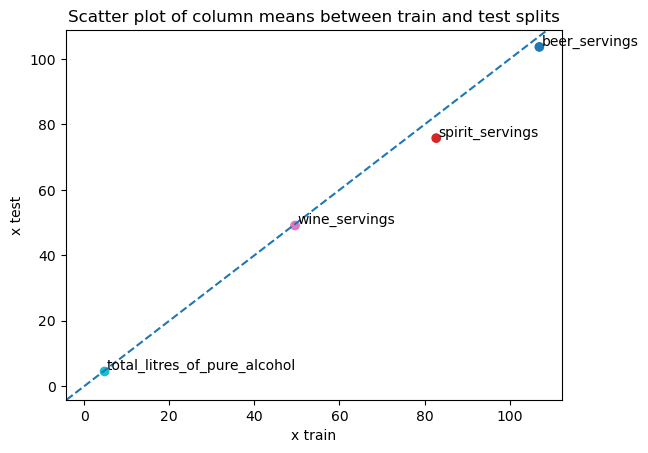

In [88]:
# Statistics for training set
x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

# Statistics for test set
x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

column_names = ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
plt.scatter(x_train_mean, x_test_mean, cmap='tab10', c=range(len(column_names)))
plt.axline((1, 1), slope=1, linestyle="--")
plt.title("Scatter plot of column means between train and test splits")
plt.xlabel("x train")
plt.ylabel("x test")
for i, txt in enumerate(column_names):
    plt.annotate(txt, (x_train_mean[i], x_test_mean[i]), xytext=(x_train_mean[i]+0.5, x_test_mean[i]+0.5))

plt.show()

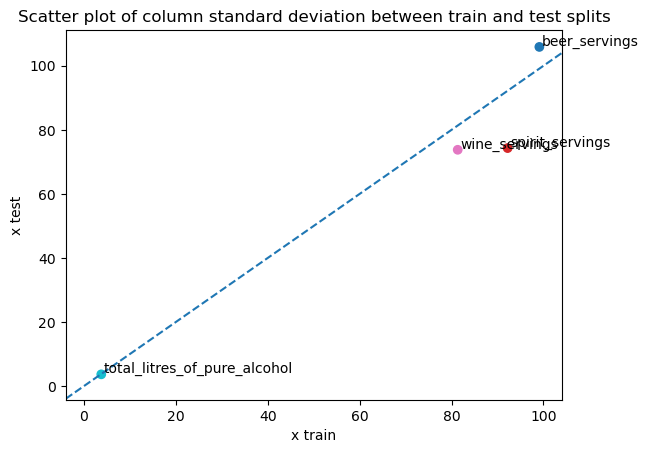

In [89]:
plt.scatter(x_train_std, x_test_std, cmap='tab10', c=range(len(column_names)))
plt.axline((1, 1), slope=1, linestyle="--")
plt.title("Scatter plot of column standard deviation between train and test splits")
plt.xlabel("x train")
plt.ylabel("x test")
for i, txt in enumerate(column_names):
    plt.annotate(txt, (x_train_std[i], x_test_std[i]), xytext=(x_train_std[i]+0.5, x_test_std[i]+0.5))

plt.show()

# Comparing training and test sets

Distribuitons of data per column look similar enough between training split and test split.

Normalized histogram of train and test values per column


/var/folders/x_/z_khh07d54g2h6ng_klqflhr0000gn/T/ipykernel_97528/1345280957.py:10: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ax, (colname, values) in zip(axs.flat, x_test_df.iteritems()):


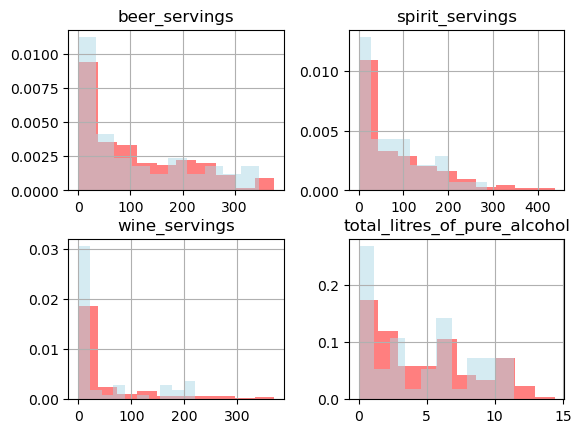

In [90]:
# drink_Data[['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']].hist()
x_train_df = pd.DataFrame(x_train)
x_train_df.columns = column_names

x_test_df = pd.DataFrame(x_test)
x_test_df.columns = column_names

print("Normalized histogram of train and test values per column")
axs = x_train_df.hist(alpha=0.5, color='red', density=True)
for ax, (colname, values) in zip(axs.flat, x_test_df.iteritems()):
  values.hist(ax=ax, bins=10, alpha=0.5, color='lightblue', density=True)

plt.show()


# Aggregation

Reads from a CSV and assigns it to a variable called 'daily'. Assumes first row of CSV contains column headers. It then sets the index of the 'daily' DataFrame to a datetime object from the 'ReadingDateTime' column using pd.to_datetime function. It then plots the variance throughout the years.

Text(0.5, 1.0, 'Daily Value for Species (variance = 2943.2929)')

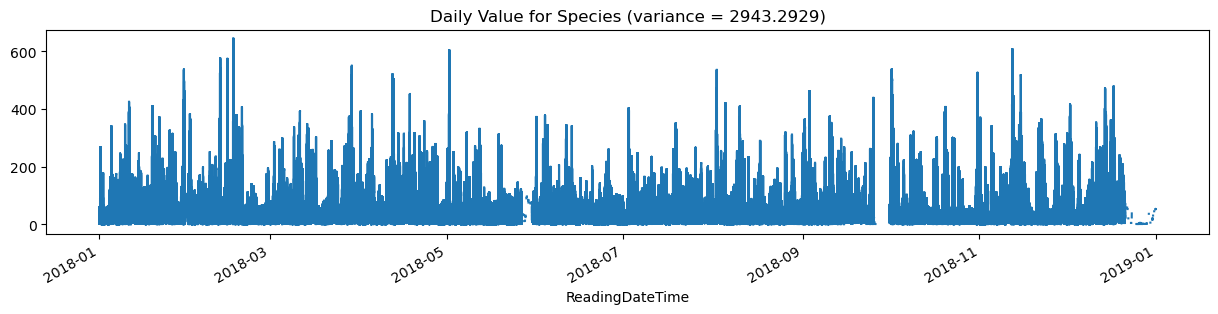

In [91]:
daily = pd.read_csv('./Data/LaqnData.csv', header='infer')
daily.index = pd.to_datetime(daily['ReadingDateTime'])
daily = daily['Value']
ax = daily.plot(kind='line',figsize=(15,3))
ax.set_title('Daily Value for Species (variance = %.4f)' % (daily.var()))

In [92]:
daily

ReadingDateTime
2018-01-01 00:00:00     NaN
2018-01-01 00:15:00     NaN
2018-01-01 00:30:00     NaN
2018-01-01 00:45:00     NaN
2018-01-01 01:00:00     NaN
                       ... 
2018-12-31 22:45:00    57.0
2018-12-31 23:00:00    61.1
2018-12-31 23:15:00    61.1
2018-12-31 23:30:00    61.1
2018-12-31 23:45:00    61.1
Name: Value, Length: 175200, dtype: float64

Text(0.5, 1.0, 'Monthly Value of Species (variance = 3670839748.8799)')

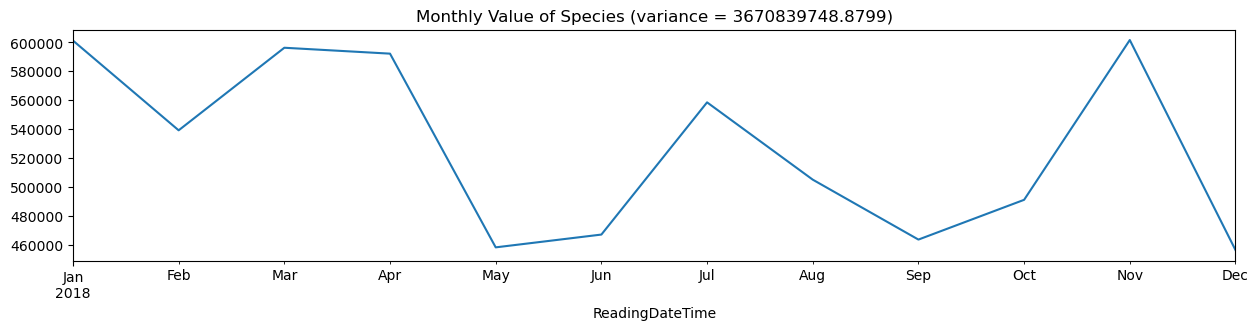

In [93]:
monthly = daily.groupby(pd.Grouper(freq='M')).sum()
ax = monthly.plot(kind='line',figsize=(15,3))
ax.set_title('Monthly Value of Species (variance = %.4f)' % (monthly.var()))

/Users/gabenicula/anaconda3/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:1400: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


Text(0.5, 1.0, 'Annual Value of Species (variance = nan)')

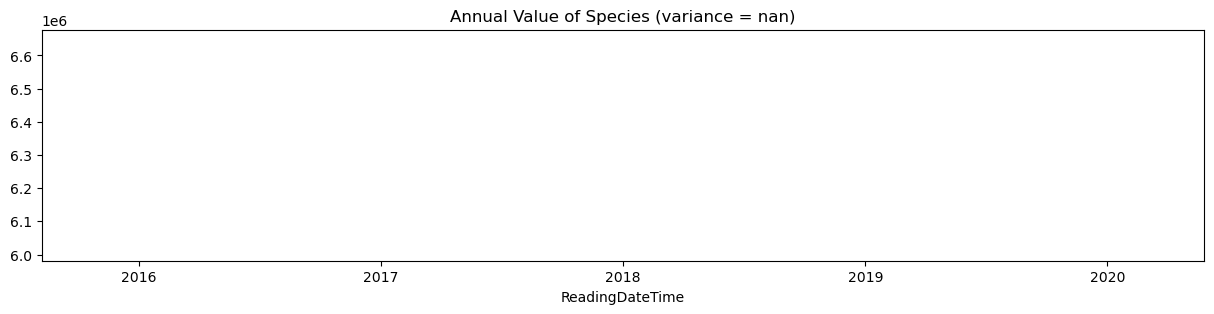

In [94]:
# WILL NOT USE SINCE OUR CSV ONLY HAS 1 YEAR (2018)
annual = daily.groupby(pd.Grouper(freq='Y')).sum()
ax = annual.plot(kind='line',figsize=(15,3))
ax.set_title('Annual Value of Species (variance = %.4f)' % (annual.var()))

# Sampling

Sampling is a technique used in data analysis to make large datasets more manageable. Imagine you have a massive dataset with millions or billions of data points. Performing analyses and visualizations on such a vast dataset can be computationally intensive and time-consuming. Here's where sampling comes into play.

Sampling without Replacement: In this method, you randomly select a subset of data points from the original dataset. Each data point can be chosen only once, and once selected, it's removed from the dataset. This way, you obtain a smaller but representative sample of the original data. EDA can then be performed on this sample, giving you insights and patterns that can be extrapolated to the entire dataset with some degree of confidence.

Sampling with Replacement: In contrast, when you use sampling with replacement, each data point you select is not removed from the dataset. This means that the same data point can be selected multiple times. Sampling with replacement can be useful if you want to create bootstrap samples for statistical analysis or if you're dealing with imbalanced datasets where some classes are underrepresented.

In [95]:
drink_Data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,encoded_country
0,Afghanistan,0,0,0,0.0,Asia,0
1,Albania,89,132,54,4.9,Europe,1
2,Algeria,25,0,14,0.7,Africa,2
3,Andorra,245,138,312,12.4,Europe,3
4,Angola,217,57,45,5.9,Africa,4


In [96]:
sample = drink_Data.sample(n=3)
sample

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,encoded_country
185,Uruguay,115,35,220,6.6,South America,185
44,Cyprus,192,154,113,8.2,Europe,44
65,Germany,346,117,175,11.3,Europe,64


In [97]:
sample = drink_Data.sample(frac=0.01, random_state=1)
sample

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,encoded_country
44,Cyprus,192,154,113,8.2,Europe,44
69,Guatemala,53,69,2,2.2,North America,68


In [98]:
sample = air_Data.sample(frac=0.1, replace=True, random_state=1)
sample

,Site,ReadingDateTime,Value,Units,Provisional or Ratified,Species-CO,Species-NO,Species-NO2,Species-NOX,Species-O3
128037,HI0,27/08/2018 17:15,49.2,ug m-3 as NO2,R,0,0,0,1,0
5192,HI0,24/02/2018 02:00,NaN,mg m-3,P,1,0,0,0,0
50057,HI0,06/06/2018 10:15,5.4,ug m-3,R,0,1,0,0,0
109259,HI0,13/02/2018 02:45,21.2,ug m-3 as NO2,R,0,0,0,1,0
73349,HI0,04/02/2018 01:15,15.0,ug m-3,R,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
38124,HI0,02/02/2018 03:00,0.2,ug m-3,R,0,1,0,0,0
61423,HI0,02/10/2018 19:45,1.7,ug m-3,R,0,1,0,0,0
16011,HI0,16/06/2018 18:45,NaN,mg m-3,P,1,0,0,0,0
144902,HI0,19/02/2018 09:30,1.7,ug m-3,R,0,0,0,0,1


# Discretization

0.0     13
4.9      4
0.7      3
12.4     1
5.9      3
        ..
6.4      2
3.9      1
1.4      1
5.7      1
8.7      1
Name: total_litres_of_pure_alcohol, Length: 90, dtype: int64

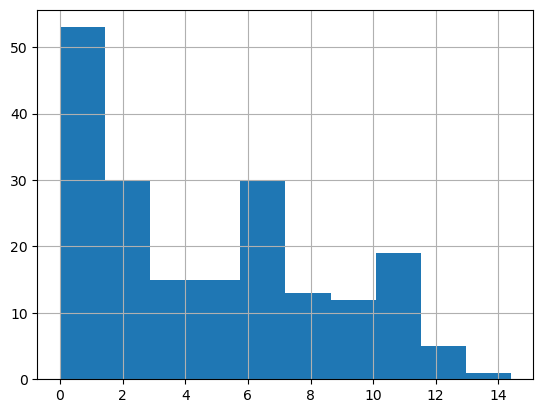

In [99]:
drink_Data['total_litres_of_pure_alcohol'].hist(bins=10)
drink_Data['total_litres_of_pure_alcohol'].value_counts(sort=False)

In [100]:
bins = pd.cut(drink_Data['total_litres_of_pure_alcohol'],4)
bins.value_counts(sort=False)

(-0.0144, 3.6]    87
(3.6, 7.2]        59
(7.2, 10.8]       33
(10.8, 14.4]      14
Name: total_litres_of_pure_alcohol, dtype: int64

In [101]:
bins = pd.qcut(drink_Data['total_litres_of_pure_alcohol'],4)
bins.value_counts(sort=False)

(-0.001, 1.3]    52
(1.3, 4.2]       45
(4.2, 7.2]       49
(7.2, 14.4]      47
Name: total_litres_of_pure_alcohol, dtype: int64

# Principal Component Analysis

The code below loads six images, displays them in a 4x4 grid within a Matplotlib figure, and also stores the flattened pixel data of each image in the imgData NumPy array for further processing or analysis. The images are assumed to be 256x256 pixels each, and the code assumes a specific naming convention for the image files.

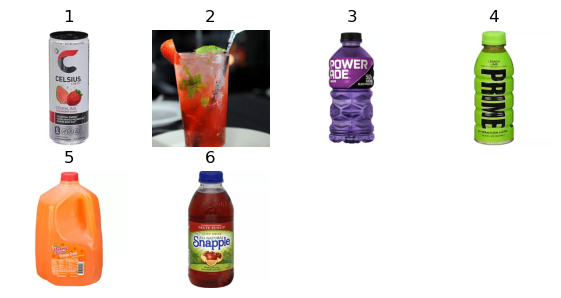

In [102]:
# PICTURES IS 256 x 256
numImages = 6
fig = plt.figure(figsize=(7,7))
imgData = np.zeros(shape=(numImages,196608))

for i in range(1,numImages+1):
    filename = 'data_Pic/Picture'+str(i)+'.jpg'
    img = mpimg.imread(filename)
    ax = fig.add_subplot(4,4,i)
    plt.imshow(img)
    plt.axis('off')
    ax.set_title(str(i))
    imgData[i-1] = np.array(img.flatten()).reshape(1,img.shape[0]*img.shape[1]*img.shape[2])

The code below performs PCA to reduce the dimensionality of the image data to two principal components and then creates a DataFrame to visualize the reduced data along with the drink labels for each image. This can be useful for visualizing the relationships or clusters among the images based on their reduced-dimensional representations.

In [103]:
import pandas as pd
from sklearn.decomposition import PCA

numComponents = 2
pca = PCA(n_components=numComponents)
pca.fit(imgData)

projected = pca.transform(imgData)
projected = pd.DataFrame(projected,columns=['pc1','pc2'],index=range(1,numImages+1))
projected['drink'] = ['energy drink', 'alcohol','energy drink','energy drink', 'juice', 'juice']
projected

,pc1,pc2,drink
1,-13888.266845,-3824.372095,energy drink
2,60778.894246,-2701.257537,alcohol
3,-14213.624857,-9285.123620,energy drink
4,-14931.018828,-5056.830314,energy drink
5,-5714.527126,24482.476841,juice
6,-12031.456590,-3614.893275,juice


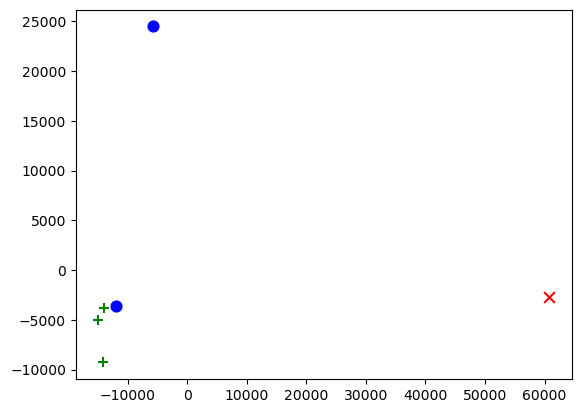

In [104]:
import matplotlib.pyplot as plt

colors = {'energy drink':'g', 'alcohol':'r', 'juice':'b'}
markerTypes = {'energy drink':'+', 'alcohol':'x', 'juice':'o'}

for drinkType in markerTypes:
    d = projected[projected['drink']==drinkType]
    plt.scatter(d['pc1'],d['pc2'],c=colors[drinkType],s=60,marker=markerTypes[drinkType])

# PCA Analysis on drink dataset.
Using all four numerical features that were used for extracting x_train/x_test and projecting them on their 2 principal components.

<Axes: title={'center': 'Scatterplot of PC1 and PC2 for drinks dataset'}, xlabel='pc1', ylabel='pc2'>

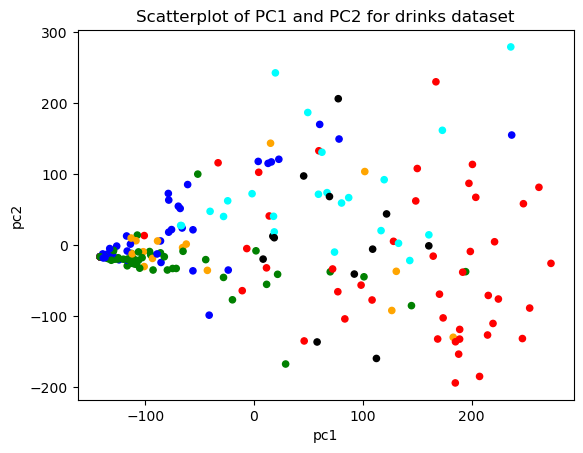

In [105]:
# Map continents to colors
colors = {'Africa':'g', 'Europe':'r', 'Asia':'b', 'North America': 'cyan', 'Oceania':'orange', 'South America': 'black'}

numComponents = 2
pca = PCA(n_components=numComponents)
numerical_drink_Data = drink_Data[['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']]
pca.fit(numerical_drink_Data)

projected = pca.transform(numerical_drink_Data)
projected = pd.DataFrame(projected,columns=['pc1','pc2'])

projected.plot.scatter(x='pc1',y='pc2',c=drink_Data.continent.map(colors), 
                       s=20, title='Scatterplot of PC1 and PC2 for drinks dataset')
